### introduction - imports and data load

- in this section I import the relevant python libraries and load the database

In [203]:
#imports

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import os


%matplotlib inline
sns.set_style('darkgrid')


In [204]:
#loading the database
house_data = pd.read_csv("c:\Lori\Projects\EPAM\Kaggle_house_sales_project\kc_house_data.csv", parse_dates=['date'])

## Data exploration analysis

- exploring and examining the loaded data, checking for NaNs, errors

In [205]:
#first glance
house_data.head(5)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [206]:
#size/shape of the database
house_data.shape

(21613, 21)

In [207]:
#getting the column names
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [208]:
#checking for nans for the whole data, if is true then more examination is needed
house_data.isnull().any().any()

False

In [209]:
#getting 
house_data.describe()

#just a note to myself that some of the maximum values seem exagerated so need to examine some of them (example: 33 bedrooms)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [210]:
house_data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

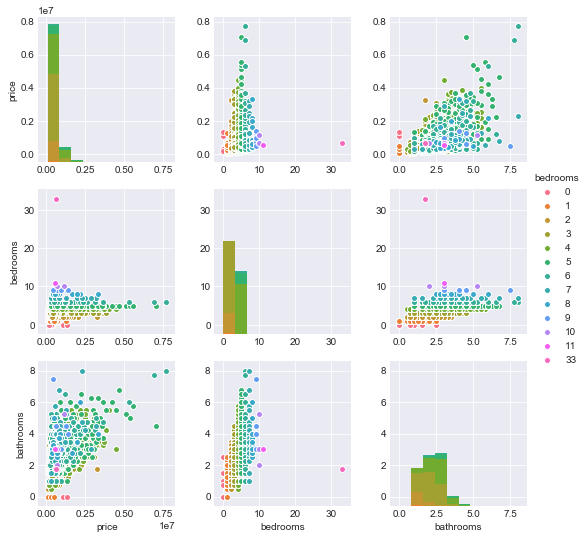

In [211]:
#visualizing the 33 bedroom case
sns.pairplot(house_data[['price', 'bedrooms', 'bathrooms']], hue="bedrooms")

As we can see it on the graphs above the 33 bedroom house seems to be a typo as the price and the bathroom numbers also indicate that it should be rather 3 bedrooms. 

In [212]:
#indentifying the sample with 33 bedrooms
house_data[house_data.bedrooms ==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [213]:
#change the 33 bedrooms to 3 bedrooms
house_data.loc[house_data.bedrooms ==33, "bedrooms"] = 3

In [214]:
#check if the change took place
house_data.loc[house_data.id ==2402100895, :]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,2014-06-25,640000.0,3,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [215]:
#indentifying the sample with 13540 sqft
house_data[house_data.sqft_living ==13540]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12777,1225069038,2014-05-05,2280000.0,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


The sqft_above + sqft_basement and the sqft_lot suggests this data seems correct, therefore there will be no modifications made.

In [216]:
#comparing the basement vs living squarefeet
house_data.loc[house_data.sqft_above<house_data.sqft_basement, :].head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
249,3797001895,2015-04-22,481000.0,3,1.75,1560,3000,1.0,0,0,...,6,770,790,1918,0,98103,47.6846,-122.345,1390,3000
881,2349300060,2015-02-12,200000.0,4,2.00,1920,4822,1.0,0,0,...,6,920,1000,1914,0,98136,47.5507,-122.381,1120,4822
992,1455600030,2015-01-08,645000.0,4,2.00,2780,11583,1.0,0,3,...,8,1190,1590,1955,0,98125,47.7293,-122.284,2580,10241
1202,1231000510,2014-09-22,263000.0,3,1.75,1490,3800,1.0,0,0,...,6,700,790,1913,0,98118,47.5554,-122.270,2180,4000
1203,1231000510,2015-05-04,510000.0,3,1.75,1490,3800,1.0,0,0,...,6,700,790,1913,0,98118,47.5554,-122.270,2180,4000
1208,3885804305,2014-09-11,949000.0,4,1.75,2490,7834,1.0,0,3,...,8,1240,1250,1958,0,98033,47.6851,-122.209,3210,7834
1605,925049360,2015-04-28,512000.0,2,2.00,1270,3881,1.0,0,0,...,6,610,660,1926,0,98105,47.6694,-122.298,1370,5000
1737,5402100045,2015-03-11,189950.0,4,2.00,1910,4225,1.0,0,0,...,6,910,1000,1919,0,98001,47.3084,-122.234,1060,4800
2264,4037400295,2014-07-30,618000.0,4,2.25,2530,8736,1.0,0,0,...,7,1210,1320,1958,0,98008,47.6049,-122.126,1720,8500
2529,3126049094,2014-11-12,392450.0,4,2.00,2195,2681,1.0,0,0,...,7,1060,1135,1912,0,98103,47.6965,-122.342,1710,1280


In [217]:
#checking if the basement sqft + above sqft equals the sqft living for all records 

house_data.sqft_check = house_data.sqft_above + house_data.sqft_basement
house_data.sqft_bool = house_data.sqft_check==house_data.sqft_living
house_data.sqft_bool.value_counts()

True    21613
dtype: int64

### Data categorization
- in order to be able to summarize the data I will categorize some of the features

In [218]:
house_data.waterfront = house_data.waterfront.astype('category', ordered = True)
house_data.view = house_data.view.astype('category', ordered = True)
house_data.condition = house_data.condition.astype('category', ordered = True)
house_data.grade = house_data.grade.astype('category', ordered = False)
house_data.zipcode = house_data.zipcode.astype(str)


In [219]:
house_data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront             category
view                   category
condition              category
grade                  category
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                  object
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

### Data visualization

In [19]:
house_map = folium.Map(location=[house_data["lat"].mean(), house_data["long"].mean()], zoom_start = 20)

#marker_clust = folium.MarkerCluster().add_to(house_map)
marker_clust = folium.plugins.MarkerCluster().add_to(house_map)


max_samples = 50
for name, row in house_data.iterrows():
    folium.Marker([row['lat'], row['long']], popup = 'Sold for {} USD'.format(row['price'])).add_to(marker_clust)
    
house_map.save('my_map.html')
house_map


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


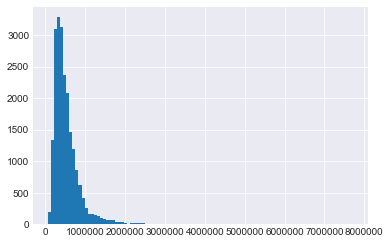

In [257]:
#price histogram
house_data.price.hist(bins=100)

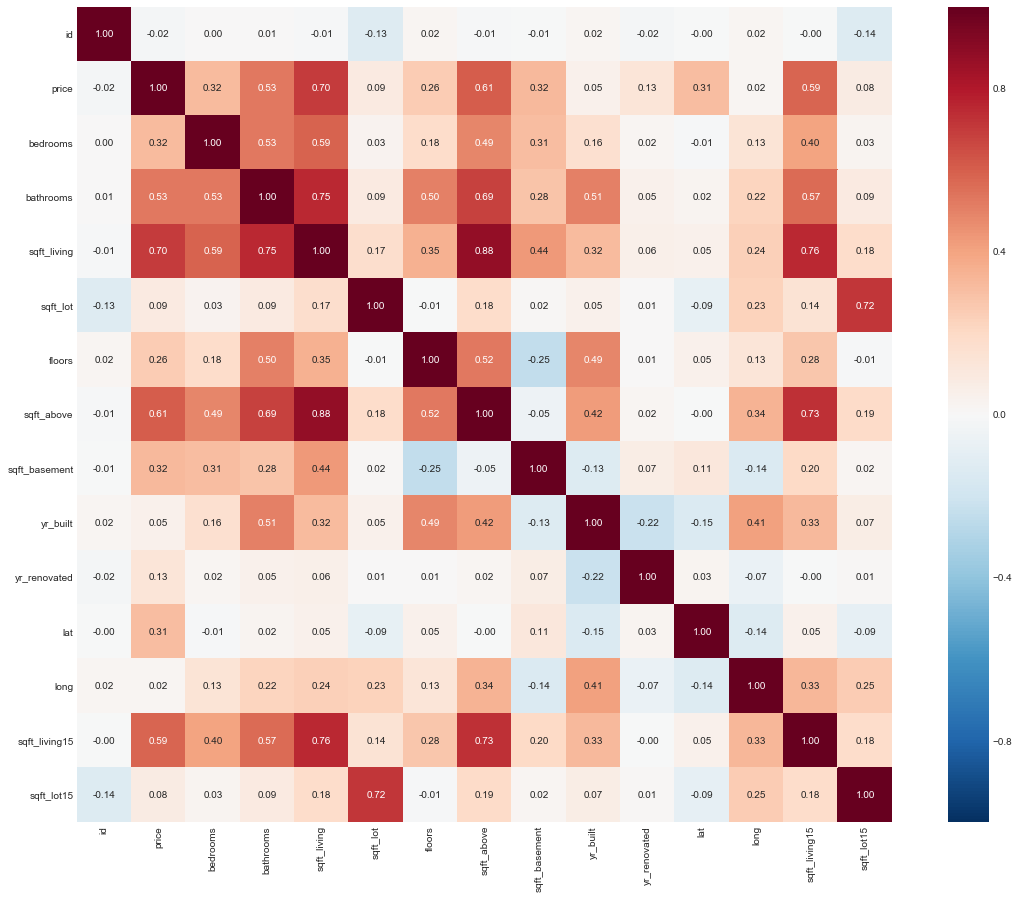

In [220]:
#examining the correlations

corr_matrix = house_data.corr() 

plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, square = True, cmap = 'RdBu_r', vmin = -1, vmax = 1, annot=True, fmt='.2f')

In [221]:
#the 10 most correlated features to the price
corr_matrix.nlargest(10, "price")['price']

price            1.000000
sqft_living      0.702035
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
sqft_basement    0.323816
bedrooms         0.315438
lat              0.307003
floors           0.256794
yr_renovated     0.126434
Name: price, dtype: float64

In [223]:
#which month to buy

house_data["month"] = house_data['date'].dt.month
house_data["year"] = house_data["date"].dt.year

#price_per_month = house_data['price'].groupby(house_data[''])

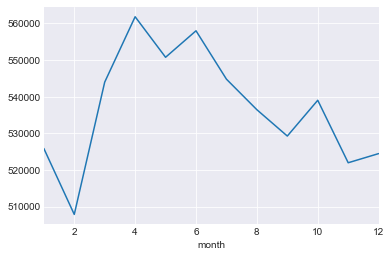

In [224]:
#it seems that the prices are lowest on average in february
price_per_month = house_data['price'].groupby(house_data.month).mean()
price_per_month.plot()

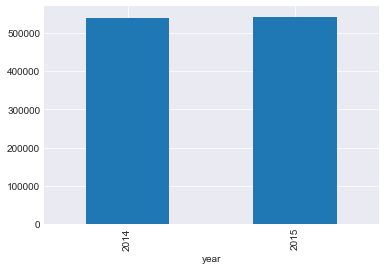

In [228]:
#checking the price differences between the two years

yearly_prices = house_data['price'].groupby(house_data.year).mean()
yearly_prices.plot(kind = "bar")

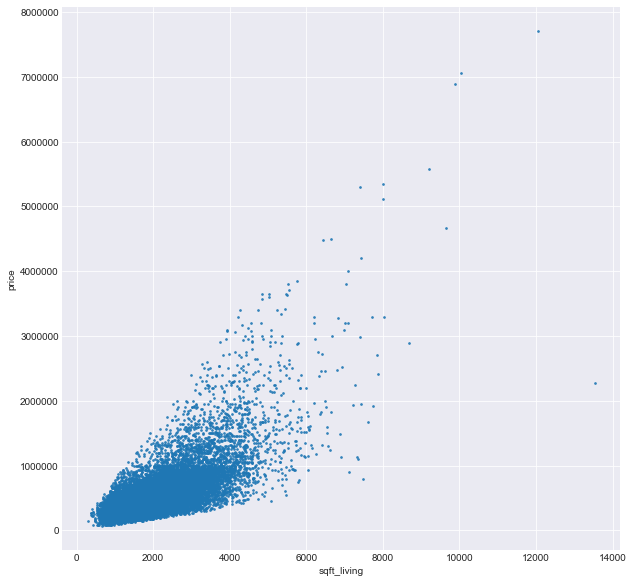

In [71]:
#price and sqft_living
plt.figure(figsize=(10, 10))
#sns.regplot(x = "sqft_living", y = "price", data = house_data, fit_reg=False, scatter_kws={"s": 2})

sns.regplot(x = "sqft_living", y = "price", data = house_data, fit_reg=False,  scatter_kws={"s": 3})

the information we can get from the heatmap and scatterplot:
    - the correlation between price and living square footage is large
    - there is almost no correlation between the price and the built year, the lot size and the longitude of the flat
    - the latitude and renovation year have more correlation than longitude and year built

In [72]:
#drop the date and id as it is not needed
house_data = house_data.drop(['id', 'date'], axis=1)

In [73]:
#transforming the data to rather have basement and renovation true or false than basement size and renovation year

house_data['basement_present'] = house_data['sqft_basement'].apply(lambda x: 1 if x>0 else 0)
house_data['basement_present'] = house_data['basement_present'].astype("category", ordered = False)

house_data['renovated'] = house_data['yr_renovated'].apply(lambda x: 1 if x>0 else 0)
house_data['renovated'] = house_data['renovated'].astype('category', ordered = False)


In [74]:
#copy to a new database and delete the basement sqft and renovation year features
new_data = house_data.copy()
new_data = new_data.drop(['yr_built', 'sqft_basement'], axis=1)


In [76]:
#setting up the dummy variables

from sklearn.preprocessing import LabelEncoder
data2encode = new_data.loc[:, ["floors", "view", "condition", "grade"]].apply(LabelEncoder().fit_transform)

In [113]:
data2encode.describe()

,floors,view,condition,grade
count,21613.000000,21613.000000,21613.000000,21613.000000
mean,0.988618,0.234303,2.409430,5.656919
std,1.079978,0.766318,0.650743,1.175216
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,5.000000
50%,1.000000,0.000000,2.000000,5.000000
75%,2.000000,0.000000,3.000000,6.000000
max,5.000000,4.000000,4.000000,11.000000


In [119]:
#all dummy variable saved and the dummy trap also took care of

from sklearn.preprocessing import OneHotEncoder
to_encode = data2encode.iloc[:,3]
to_encode = to_encode.reshape(-1,1)


onehotencoder = OneHotEncoder(categorical_features=[0])

to_encode = onehotencoder.fit_transform(to_encode).toarray()
add_encoded = pd.DataFrame(to_encode, columns = ['grade1','grade2', 'grade3', 'grade4' ,'grade5', 'grade6', 'grade7', 'grade8', 'grade9', 'grade10', 'grade11', 'grade12'])
add_encoded = add_encoded.iloc[:,:-1]
add_encoded.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


,grade1,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [120]:
concat4 = pd.concat([concat3, add_encoded], axis =1, join_axes=[concat3.index])
concat4.shape

(21613, 43)

In [121]:
#final database with all the dummy variables
concat4.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [124]:
#saved to a databased
concat4.to_csv("data_onehot_encoded.csv")

In [125]:
#deleting the categorical columns which were made dummies
columns = ['floors', 'view', 'condition', 'grade']
concat4.drop(columns, inplace = True, axis=1)

In [128]:
concat4.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,yr_renovated,zipcode,lat,...,grade2,grade3,grade4,grade5,grade6,grade7,grade8,grade9,grade10,grade11
0,221900.0,3,1.00,1180,5650,0,1180,0,98178,47.5112,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,538000.0,3,2.25,2570,7242,0,2170,1991,98125,47.7210,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,180000.0,2,1.00,770,10000,0,770,0,98028,47.7379,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,1960,5000,0,1050,0,98136,47.5208,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,3,2.00,1680,8080,0,1680,0,98074,47.6168,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [130]:
concat4.to_csv("data_before_PCA.csv")

In [156]:
#applying multiple regression 

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

In [158]:
#splitting the database
X = concat4.iloc[:,1:]
y = concat4.iloc[:,0]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =5)

In [164]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [165]:
y_pred = regressor.predict(X_test)

In [230]:
regressor.score(X_test, y_test)

0.71333019811738452

In [252]:
#random forest regression

from sklearn.ensemble import RandomForestRegressor
random_for = RandomForestRegressor(max_depth = 6, random_state=5)
random_for.fit(X_train, y_train)
rf_pred = random_for.predict(X_test)

In [253]:
random_for.score(X_train, y_train)

0.8222758997866173

In [254]:
random_for.score(X_test, y_test)

0.79032571040158872